upload labelled data and mount Google drive to colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.getcwd()

Mounted at /content/gdrive


'/content'

check info about colab environment

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [3]:
import tensorflow as tf
tf.__version__

'2.9.2'

make sure we see a GPU

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

go to the working space and install deeplabcut

In [5]:
%cd /content/gdrive/MyDrive/deeplabcut

/content/gdrive/MyDrive/deeplabcut


In [6]:
!pip install deeplabcut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 98.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 KB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.3/555.3 KB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.

In [7]:
# install packages for plot evaluations
# need to reconnect
!pip install Pillow==4.0.0

from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions):
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 76.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-4.0.0-cp38-cp38-linux_x86_64.whl size=977900 sha256=a8775eae8f030552f1887af33ef25eaf7d75c1fc61b270f6c46efb7945cc0447
  Stored in directory: /root/.cache/pip/wheels/e3/2e/74/33a7284a964c402e6d2bb64b34b0b611e9f3a673c9bc2a00ab
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35430 sha256=cbe15371e105af631599a51fcdc24abc9a11f0b75b6bc0bcca0247bb7f6f5258
  Stored in directory: /root/.cache/pip/wheels/0b/d8/16/1e2d32ad7455728b8af9efdb9d2a0c3d03cd8f2e4be0191b8c
Successfully built Pillow olefile
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling

In [ ]:
# GUIs don't work on the cloud, so label the data locally and supress wxPython
import os
os.environ["DLClight"] = "True"
os.environ["Colab"] = "True"

In [1]:
# update the path
%cd /content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27

/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27


In [2]:
# sometimes need to restart running time so that deeplabcut can be import.
import deeplabcut as dlc

Loading DLC 2.3.0...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


/usr/local/lib/python3.8/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


edit the project path in the config.yaml file to the google drive link. Then set the variable below

In [3]:
config_path = '/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/config.yaml'

In [4]:
# create training dataset in colab, because the local is windows but colab is Linux
dlc.create_training_dataset(config_path, num_shuffles = 1, augmenter_type='imgaug')

/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/labeled-data/group4_sdax18817_045-12092022174252-0000/CollectedData_huiqi.h5  not found (perhaps not annotated).
/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/labeled-data/group5_sdax2M_004-12072022123702-0000/CollectedData_huiqi.h5  not found (perhaps not annotated).
/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/labeled-data/group5_sdax2M_031-12232022145305-0000/CollectedData_huiqi.h5  not found (perhaps not annotated).
/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/labeled-data/group5_sdax2M_034-12232022150644-0000/CollectedData_huiqi.h5  not found (perhaps not annotated).
/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/labeled-data/group6_28764x3040_006-12222022143433-0000/CollectedData_huiqi.h5  not found (perhaps not annotated).
/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27

[(0.95,
  1,
  (array([109,  71,  37,  74, 108, 227, 156, 220, 152, 194,  76, 202,  83,
          157, 234, 134, 184, 111, 221,   8, 101, 179,  89, 122,   5,  22,
          199,  97,  12, 166,  55,  44, 149, 125, 144, 118, 145, 170,  64,
           92, 154,  45, 219,  18, 106,  15, 104,   7, 110, 239,  63, 153,
          233, 139,  96,  33, 231, 158, 116, 168,  75, 215,  90, 230, 201,
          155,  16, 218, 129,  73,   4, 107,  61, 210,  52,  66,  26, 176,
          162, 213,  40,  13,   3, 226,  24,  30, 214,  60,  56, 130, 136,
           19, 178, 161,  54, 191,  80,  51, 171, 181, 124,  86, 126, 135,
          169, 123,  41,  14,  27,  50, 217,  20, 159,  46, 188, 235, 138,
          209,  62, 206,   2,  59, 146, 223,  43, 187,  10, 137, 189, 112,
          173,  98, 150,  93, 160, 229, 113,   0,  94,  95,  69,  49,  48,
           85, 237, 141,  23, 143,  78, 100, 131, 205, 238,   6,  68,  84,
          121, 224, 180, 203, 198, 182,  91, 204,  11, 119, 102,  35,  57,
           6

In [5]:
# start training
dlc.train_network(config_path,shuffle = 1, displayiters = 500,saveiters=10000,maxiters=200000)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19],
                [20],
                [21],
                [22],
                [23],
                [24],
                [25],
                [26],
                [27],
                [28],
                [29],
                [30]],
 'all_joints_names': ['antennae midpoint',
                      'neck',
                      'left eye',
                      'right eye',
                      'left base of abdomen',
                      'right base of abdomen',
                      'tip of abdomen',
                      'left front leg base',

Selecting single-animal trainer
Batch Size is 1


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 200000
Display_iters overwritten as 500
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-MC-huiqi-2022-12-27/dlc-models/iteration-0/flies-bang-seizure-MCDec27-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 

iteration: 500 loss: 0.0523 lr: 0.005
iteration: 1000 loss: 0.0351 lr: 0.005
iteration: 1500 loss: 0.0350 lr: 0.005
iteration: 2000 loss: 0.0335 lr: 0.005
iteration: 2500 loss: 0.0332 lr: 0.005
iteration: 3000 loss: 0.0322 lr: 0.005
iteration: 3500 loss: 0.0318 lr: 0.005
iteration: 4000 loss: 0.0306 lr: 0.005
iteration: 4500 loss: 0.0299 lr: 0.005
iteration: 5000 loss: 0.0294 lr: 0.005
iteration: 5500 loss: 0.0291 lr: 0.005
iteration: 6000 loss: 0.0286 lr: 0.005
iteration: 6500 loss: 0.0281 lr: 0.005
iteration: 7000 loss: 0.0274 lr: 0.005
iteration: 7500 loss: 0.0265 lr: 0.005
iteration: 8000 loss: 0.0266 lr: 0.005
iteration: 8500 loss: 0.0265 lr: 0.005
iteration: 9000 loss: 0.0256 lr: 0.005
iteration: 9500 loss: 0.0253 lr: 0.005
iteration: 10000 loss: 0.0248 lr: 0.005
iteration: 10500 loss: 0.0262 lr: 0.02
iteration: 11000 loss: 0.0245 lr: 0.02
iteration: 11500 loss: 0.0226 lr: 0.02
iteration: 12000 loss: 0.0212 lr: 0.02
iteration: 12500 loss: 0.0202 lr: 0.02
iteration: 13000 loss: 0.

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-b4cbd84ce337>", line 2, in <module>
    dlc.train_network(config_path,shuffle = 1, displayiters = 500,saveiters=10000,maxiters=200000)
  File "/usr/local/lib/python3.8/dist-packages/deeplabcut/pose_estimation_tensorflow/training.py", line 223, in train_network
    raise e
  File "/usr/local/lib/python3.8/dist-packages/deeplabcut/pose_estimation_tensorflow/training.py", line 212, in train_network
    train(
  File "/usr/local/lib/python3.8/dist-packages/deeplabcut/pose_estimation_tensorflow/core/train.py", line 283, in train
    [_, loss_val, summary] = sess.run(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py", line 967, in run
    result = self._run(None, fetches, feed_dict, options_ptr,
  File "/usr/local/lib/python3.8/dist-packages/t

KeyboardInterrupt: ignored

Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_190000  with # of training iterations: 190000
Running evaluation ...


340it [01:42,  3.32it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-190000
Results for 190000  training iterations: 95 1 train error: 2.63 pixels. Test error: 10.32  pixels.
With pcutoff of 0.6  train error: 2.62 pixels. Test error: 8.62 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:37<00:00,  3.48it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_200000  with # of training iterations: 200000
Running evaluation ...


340it [00:12, 27.64it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-200000
Results for 200000  training iterations: 95 1 train error: 2.57 pixels. Test error: 9.5  pixels.
With pcutoff of 0.6  train error: 2.57 pixels. Test error: 8.59 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:38<00:00,  3.44it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_210000  with # of training iterations: 210000
Running evaluation ...


340it [00:12, 27.79it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-210000
Results for 210000  training iterations: 95 1 train error: 3.02 pixels. Test error: 9.32  pixels.
With pcutoff of 0.6  train error: 3.01 pixels. Test error: 7.48 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:37<00:00,  3.48it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_220000  with # of training iterations: 220000
Running evaluation ...


340it [00:12, 27.67it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-220000
Results for 220000  training iterations: 95 1 train error: 2.69 pixels. Test error: 10.09  pixels.
With pcutoff of 0.6  train error: 2.68 pixels. Test error: 8.77 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:38<00:00,  3.44it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_230000  with # of training iterations: 230000
Running evaluation ...


340it [00:12, 27.42it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-230000
Results for 230000  training iterations: 95 1 train error: 2.52 pixels. Test error: 9.14  pixels.
With pcutoff of 0.6  train error: 2.51 pixels. Test error: 7.44 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:38<00:00,  3.47it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_240000  with # of training iterations: 240000
Running evaluation ...


340it [00:12, 27.56it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-240000
Results for 240000  training iterations: 95 1 train error: 2.68 pixels. Test error: 10.11  pixels.
With pcutoff of 0.6  train error: 2.67 pixels. Test error: 8.72 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:37<00:00,  3.50it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_250000  with # of training iterations: 250000
Running evaluation ...


340it [00:12, 27.66it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-250000
Results for 250000  training iterations: 95 1 train error: 2.17 pixels. Test error: 9.53  pixels.
With pcutoff of 0.6  train error: 2.16 pixels. Test error: 8.92 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:38<00:00,  3.44it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_260000  with # of training iterations: 260000
Running evaluation ...


340it [00:12, 27.52it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-260000
Results for 260000  training iterations: 95 1 train error: 2.46 pixels. Test error: 9.72  pixels.
With pcutoff of 0.6  train error: 2.45 pixels. Test error: 7.36 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 340/340 [01:39<00:00,  3.41it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_270000  with # of training iterations: 270000
This net has already been evaluated!
Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)


100%|██████████| 340/340 [03:20<00:00,  1.69it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_280000  with # of training iterations: 280000
This net has already been evaluated!
Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)


100%|██████████| 340/340 [03:22<00:00,  1.68it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_290000  with # of training iterations: 290000
This net has already been evaluated!
Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)


100%|██████████| 340/340 [03:24<00:00,  1.66it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_300000  with # of training iterations: 300000
This net has already been evaluated!
Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)


100%|██████████| 340/340 [03:26<00:00,  1.65it/s]


Running  DLC_resnet50_flies-bang-seizureOct27shuffle1_310000  with # of training iterations: 310000
This net has already been evaluated!
Plotting...(attention scale might be inconsistent in comparison to when data was analyzed; i.e. if you used rescale)


100%|██████████| 340/340 [03:23<00:00,  1.67it/s]


The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


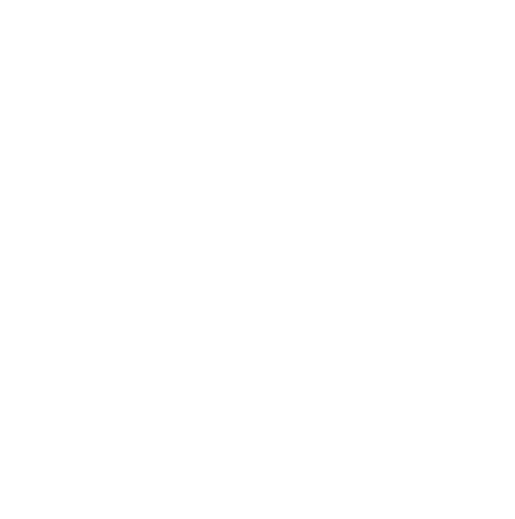

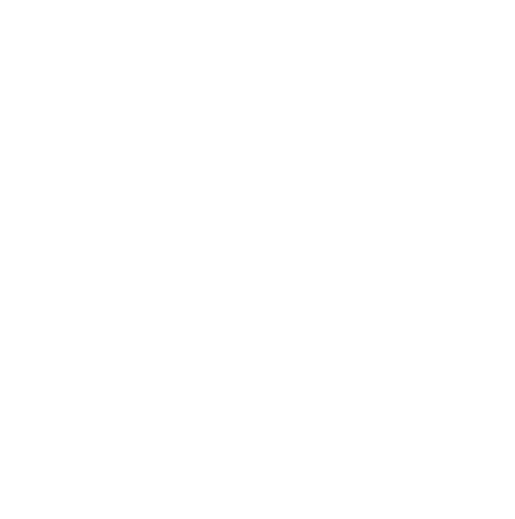

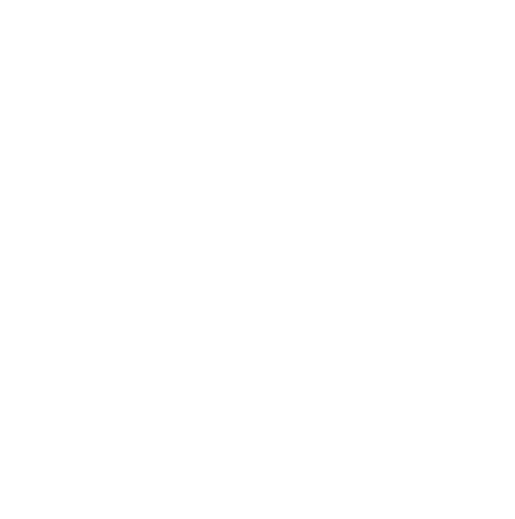

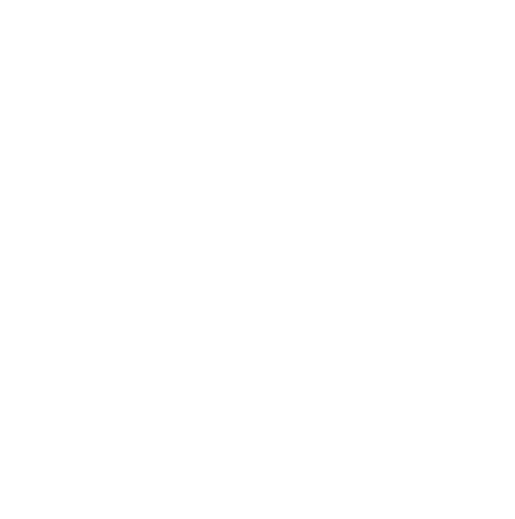

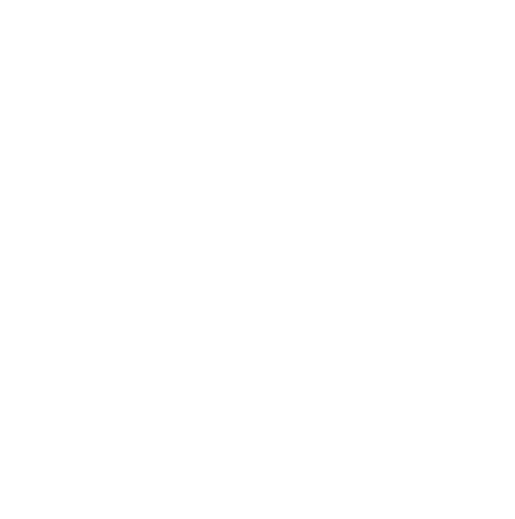

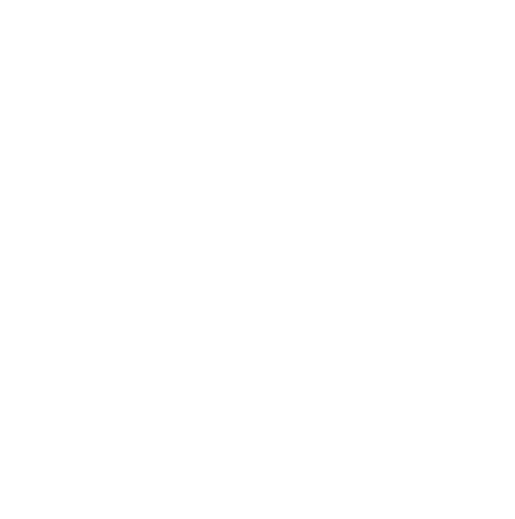

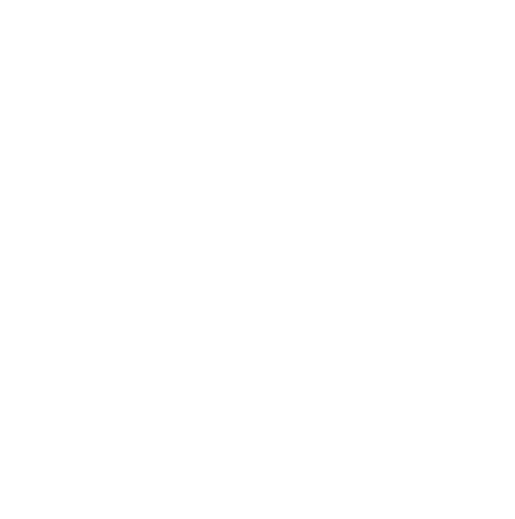

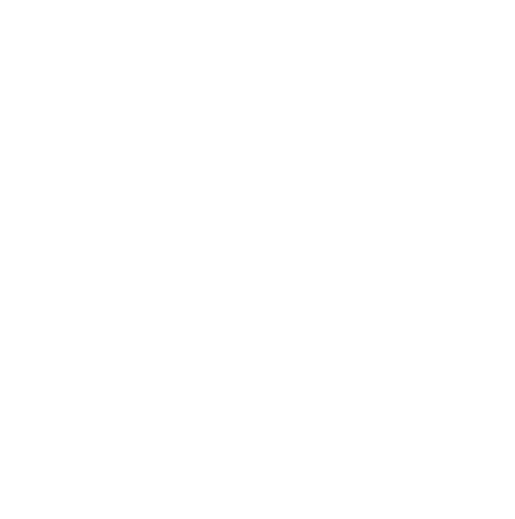

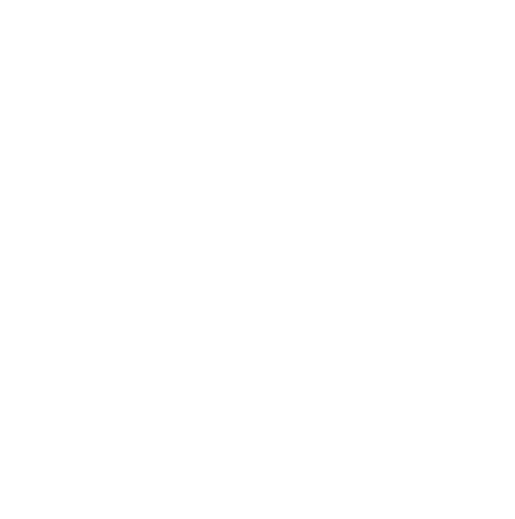

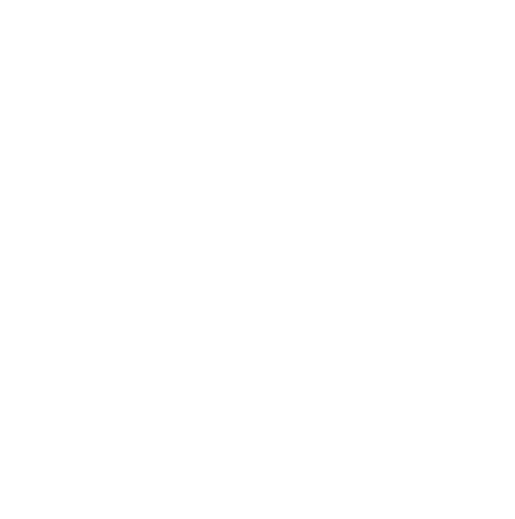

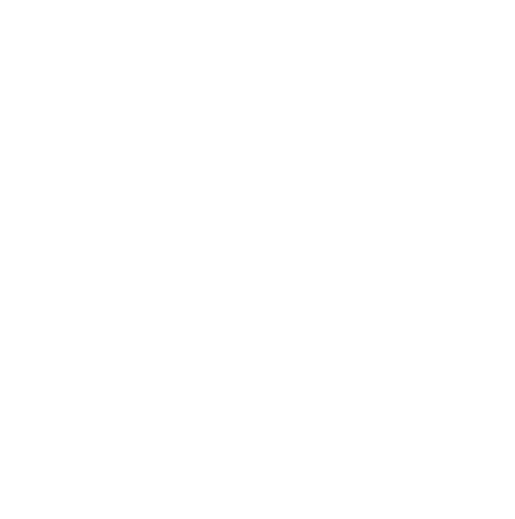

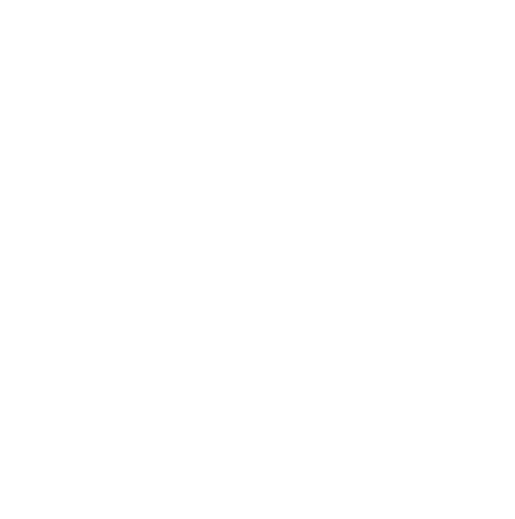

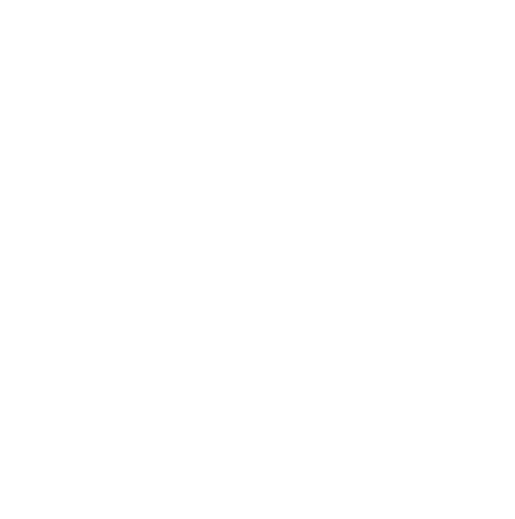

In [ ]:
# start evaluating the network, edit the 
dlc.evaluate_network(config_path,Shuffles = [1], plotting = True)

In [ ]:
# analyze video
# video_path = ['/content/gdrive/MyDrive/deeplabcut/videos use for refine model']
video_path = ['/content/gdrive/MyDrive/deeplabcut/group1_18817_009-12012022155125-0000.avi']
dlc.analyze_videos(config_path,video_path,shuffle = 1,save_as_csv = True, videotype = '.avi')


Using snapshot-260000 for model /content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-huiqi-2022-10-27/dlc-models/iteration-1/flies-bang-seizureOct27-trainset95shuffle1
Starting to analyze %  /content/gdrive/MyDrive/deeplabcut/group1_18817_009-12012022155125-0000.avi
Loading  /content/gdrive/MyDrive/deeplabcut/group1_18817_009-12012022155125-0000.avi
Duration of video [s]:  138.05 , recorded with  100.02 fps!
Overall # of frames:  13808  found with (before cropping) frame dimensions:  448 450
Starting to extract posture


100%|█████████▉| 13800/13808 [03:32<00:00, 64.87it/s]


Saving results in /content/gdrive/MyDrive/deeplabcut...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_flies-bang-seizureOct27shuffle1_260000'

In [ ]:
# create videos with labels
#video_path = ['/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos']
video_path = ['/content/gdrive/MyDrive/deeplabcut/group1_18817_009-12012022155125-0000.avi']
dlc.create_labeled_video(config_path,video_path) 

Starting to process video: /content/gdrive/MyDrive/deeplabcut/group1_18817_009-12012022155125-0000.avi
Loading /content/gdrive/MyDrive/deeplabcut/group1_18817_009-12012022155125-0000.avi and data.
Duration of video [s]: 138.08, recorded with 100 fps!
Overall # of frames: 13808 with cropped frame dimensions: 448 450
Generating frames and creating video.


100%|██████████| 13808/13808 [00:50<00:00, 274.62it/s]


In [ ]:
dlc.extract_outlier_frames(config_path,video_path)

/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:401: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sum_ = temp_dt.sum(axis=1, level=1)


Analyzing all the videos in the directory...
Method  jump  found  1591  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Frames from video untreat_002  already extracted (more will be added)!
Loading video...
Duration of video [s]:  551.7045454545454 , recorded @  10.56 fps!
Overall # of frames:  2913 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 275.85  seconds.
Extracting and downsampling... 1591  frames from the video.


1591it [04:07,  6.42it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [1057, 2723, 12, 1555, 2458, 1059, 425, 2796, 1846, 2038, 1345, 2136, 273, 1414, 1364, 2617, 568, 836, 206, 1300]


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:460: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  askuser = input("yes/no")


Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_002.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_002.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  jump  found  948  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Frames from video untreat_004  already extracted (more will be added)!
Loading video...
Duration of video [s]:  418.28681424446

948it [01:21, 11.63it/s]


Kmeans clustering ... (this might take a while)


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_004/img1742.png is a low contrast image
  io.imsave(imagename1, image)
/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_004/img1359.png is a low contrast image
  io.imsave(imagename1, image)
/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_004/img1403.png is a low contrast image
  io.imsave(imagename1, image)
/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat

Let's select frames indices: [1309, 1742, 1075, 1359, 1403, 1411, 2141, 1288, 1385, 70, 1697, 392, 1316, 1496, 1704, 978, 993, 1351, 1925, 1281]
Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_004.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_004.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  jump  found  2366  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a differe

2366it [06:09,  6.40it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [670, 2761, 1778, 21, 1882, 304, 2676, 1860, 969, 2645, 578, 2008, 1082, 1622, 1828, 2334, 1080, 2452, 2587, 1162]


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:460: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  askuser = input("yes/no")


Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_001.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_001.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.
Method  jump  found  2290  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noy
Loading video...
Duration of video [s]:  603.8387715930902 , recorded @  10.42 fps!
Overall # of frames:  3146 with (cropped) 

2290it [03:43, 10.24it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [1446, 245, 2959, 1119, 1592, 2467, 3121, 1543, 1875, 1486, 1506, 2155, 1932, 2807, 974, 2864, 1969, 480, 1995, 1466]


/usr/local/lib/python3.7/dist-packages/deeplabcut/refine_training_dataset/outlier_frames.py:946: UserWarning: /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/labeled-data/untreat_003/img1446.png is a low contrast image
  io.imsave(imagename1, image)


Attempting to create a symbolic link of the video ...
Symlink creation impossible (exFat architecture?): cutting/pasting the video instead.
/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi moved to /content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/videos/untreat_003.avi
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\untreat_003.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [ ]:
# the network is not trained enough. go on training directly
dlc.train_network(config_path,shuffle = 1, displayiters = 500,saveiters=10000,maxiters=200000)

Selecting single-animal trainer


Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13]],
 'all_joints_names': ['mouth',
                      'head',
                      'thorax',
                      'belly_upper',
                      'belly_mid',
                      'belly_dist',
                      'legDist_left_fore',
                      'legDist_left_mid',
                      'legDist_left_hind',
                      'legDist_right_fore',
                      'legDist_right_mid',
                      'legDist_right_hind',
                      'thorax_back',
                      'abdomen'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              

Batch Size is 1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading already trained DLC with backbone: resnet_50
Max_iters overwritten as 100000
Display_iters overwritten as 500
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/gdrive/MyDrive/deeplabcut/flies-seizure-huiqi-2022-10-13/dlc-models/iteration-0/flies-seizureOct13-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, '

iteration: 80500 loss: 0.0019 lr: 0.005
iteration: 81000 loss: 0.0019 lr: 0.005
iteration: 81500 loss: 0.0018 lr: 0.005
iteration: 82000 loss: 0.0019 lr: 0.005
iteration: 82500 loss: 0.0018 lr: 0.005
iteration: 83000 loss: 0.0019 lr: 0.005
iteration: 83500 loss: 0.0018 lr: 0.005
iteration: 84000 loss: 0.0018 lr: 0.005
iteration: 84500 loss: 0.0018 lr: 0.005
iteration: 85000 loss: 0.0018 lr: 0.005
iteration: 85500 loss: 0.0018 lr: 0.005
iteration: 86000 loss: 0.0018 lr: 0.005
iteration: 86500 loss: 0.0017 lr: 0.005
iteration: 87000 loss: 0.0018 lr: 0.005
iteration: 87500 loss: 0.0017 lr: 0.005
iteration: 88000 loss: 0.0018 lr: 0.005
iteration: 88500 loss: 0.0017 lr: 0.005
iteration: 89000 loss: 0.0017 lr: 0.005
iteration: 89500 loss: 0.0017 lr: 0.005
iteration: 90000 loss: 0.0017 lr: 0.005
iteration: 90500 loss: 0.0019 lr: 0.02
iteration: 91000 loss: 0.0021 lr: 0.02
iteration: 91500 loss: 0.0019 lr: 0.02
iteration: 92000 loss: 0.0020 lr: 0.02
iteration: 92500 loss: 0.0020 lr: 0.02
itera

In [ ]:
# merge refined dataset 
dlc.merge_datasets(config_path)

Merged data sets and updated refinement iteration to 1.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


In [ ]:
# check labels
dlc.check_labels(config_path)

Creating images with labels by huiqi.


100%|██████████| 20/20 [00:07<00:00,  2.78it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [ ]:
# create training dataset
dlc.create_training_dataset(config_path, num_shuffles = 1, augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([225, 271, 204, 274, 299,  76,  15, 278,  64, 282, 167,  89,  68,
           59, 318, 236,  26, 175,  63,  37, 126, 199, 219,  55, 216, 281,
           54, 160, 161, 310, 255, 287, 106, 173, 132, 141, 102, 101, 261,
          321, 146,  52,  60,  56, 153, 196, 136,  78, 171,  21, 198,  74,
          144,  49, 295, 137, 294, 181,   7,   6, 286,  92,  22, 135,  65,
          134,  66, 100,  12, 238, 249,  17, 150, 176, 124, 194, 224, 226,
          164, 334, 189, 166, 122,  81,   1, 103,   8, 229, 206, 133, 272,
          230, 170, 240, 214,   5,  33, 319, 330,  34, 280,  97,  85, 254,
          158, 268,  45, 232, 213, 120, 156, 116, 108, 220,  90, 235, 200,
          234, 297,  73, 332, 322, 239, 140,  29, 145,  20,  46, 264, 276,
           27, 191, 306, 142, 159, 304, 246, 331,  35, 190, 179, 215, 336,
           44, 252, 129, 250, 111, 221, 303,  18, 217,  79, 168,  71, 233,
          284, 326, 228, 210,  83, 337, 118, 339, 317, 110, 309, 157, 152,
           1

In [ ]:
config_path = '/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-huiqi-2022-10-27/config.yaml'

In [ ]:
# go on training
dlc.train_network(config_path,shuffle = 1, displayiters = 500,saveiters=10000,maxiters=200000)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13]],
 'all_joints_names': ['mouth',
                      'head',
                      'thorax',
                      'belly_upper',
                      'belly_mid',
                      'belly_dist',
                      'legDist_left_front',
                      'legDist_left_mid',
                      'legDist_left_back',
                      'legDist_right_front',
                      'legDist_right_mid',
                      'legDist_right_back',
                      'thorax_back',
                      'abdomen'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
            

Selecting single-animal trainer
Batch Size is 1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading already trained DLC with backbone: resnet_50
Max_iters overwritten as 200000
Display_iters overwritten as 500
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/content/gdrive/MyDrive/deeplabcut/flies-bang-seizure-huiqi-2022-10-27/dlc-models/iteration-1/flies-bang-seizureOct27-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict'

iteration: 180500 loss: 0.0039 lr: 0.005
iteration: 181000 loss: 0.0037 lr: 0.005
iteration: 181500 loss: 0.0037 lr: 0.005
iteration: 182000 loss: 0.0038 lr: 0.005
iteration: 182500 loss: 0.0037 lr: 0.005
iteration: 183000 loss: 0.0036 lr: 0.005
iteration: 183500 loss: 0.0035 lr: 0.005
iteration: 184000 loss: 0.0036 lr: 0.005
iteration: 184500 loss: 0.0036 lr: 0.005
iteration: 185000 loss: 0.0035 lr: 0.005
iteration: 185500 loss: 0.0036 lr: 0.005
iteration: 186000 loss: 0.0035 lr: 0.005
iteration: 186500 loss: 0.0036 lr: 0.005
iteration: 187000 loss: 0.0035 lr: 0.005
iteration: 187500 loss: 0.0035 lr: 0.005
iteration: 188000 loss: 0.0036 lr: 0.005
iteration: 188500 loss: 0.0035 lr: 0.005
iteration: 189000 loss: 0.0036 lr: 0.005
iteration: 189500 loss: 0.0036 lr: 0.005
iteration: 190000 loss: 0.0035 lr: 0.005
iteration: 190500 loss: 0.0034 lr: 0.02
iteration: 191000 loss: 0.0035 lr: 0.02
iteration: 191500 loss: 0.0037 lr: 0.02
iteration: 192000 loss: 0.0035 lr: 0.02
iteration: 192500 lo

KeyboardInterrupt: ignored